In [64]:
import keras
import glob
import ntpath
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy import ndimage, misc
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

In [18]:
normalize = np.vectorize(lambda x: 1 if x > 128 else 0)

In [24]:
def to_vector(image):
    return normalize(np.array(image)).flatten()

In [29]:
def read_data(path, limit = 10):
    label_names = []
    character_data = []
    labels = []
    characters = glob.glob(path + '/*')[:limit]
    label = 0
    for character in characters:
        character_name = ntpath.basename(character)
        label_names.append(character_name)
        character_images = glob.glob(character + '/*')
        for char_image in character_images:
            image = misc.imread(char_image)
            character_data.append(to_vector(image))
            labels.append(label)
        label += 1
    return label_names, np.array(character_data), np.array(labels)

In [30]:
label_names, character_data, labels = read_data('new_data')

In [31]:
character_data.shape, labels.shape

((963, 900), (963,))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(character_data, labels)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((722, 900), (241, 900), (722,), (241,))

In [37]:
number_of_classes = 9

In [38]:
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

In [39]:
# building the model
model = Sequential()
model.add(Dense(512, input_shape=(900,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))

# compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
batch_size = 16
epochs = 10

In [41]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, 
                       verbose=1)

Train on 649 samples, validate on 73 samples
Epoch 1/10
649/649 [==============================] - 0s - loss: 0.7966 - acc: 0.7504 - val_loss: 0.1679 - val_acc: 0.9452
Epoch 2/10
649/649 [==============================] - 0s - loss: 0.1420 - acc: 0.9615 - val_loss: 0.0452 - val_acc: 0.9863

In [42]:
print('\n\n--------------------------------')
print('Test score:', score[0])
print('Test accuracy:', score[1])



--------------------------------
Test score: 0.00414013397051
Test accuracy: 1.0


In [79]:
one = Image.open('test/5.jpg')
one_vec = to_vector(one)


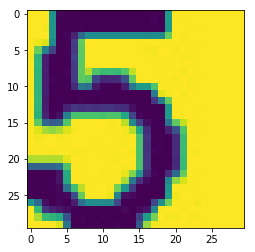

In [80]:
plt.imshow(one)
plt.show()

In [81]:
predictions = model.predict(np.array([one_vec]))

In [82]:
for ind, pred in enumerate(predictions[0]):
    print(str(ind + 1) + ' --> ' + str(pred))

1 --> 2.60478e-06
2 --> 8.25733e-07
3 --> 6.31266e-05
4 --> 2.1087e-06
5 --> 0.997156
6 --> 0.00273003
7 --> 5.83072e-07
8 --> 3.73719e-05
9 --> 7.1576e-06


In [83]:
def predict(img):
    img_vec = to_vector(img)
    predictions = model.predict(np.array([img_vec]))
    return np.argmax(predictions, axis=1)[0] + 1

In [84]:
predict(one)

5